In [ ]:
### Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
### Import dataset
df = pd.read_csv("https://raw.githubusercontent.com/bonjwow/gender-pay-gap/main/wages-by-education-level.csv", encoding = "ISO-8859-1", low_memory=False)
# df.info()
display(df)

,YEAR,Geography,Type of work,Wages,Education level,Age group,Both Sexes,Male,Female
0,1997,Canada,Both full- and part-time,Total employees,"Total, all education levels",15 years and over,11364.50,5954.5,5410.0
1,1997,Canada,Both full- and part-time,Total employees,"Total, all education levels",15-24 years,1877.80,983.1,894.7
2,1997,Canada,Both full- and part-time,Total employees,"Total, all education levels",20-34 years,4274.90,2244.3,2030.6
3,1997,Canada,Both full- and part-time,Total employees,"Total, all education levels",25 years and over,9486.70,4971.4,4515.3
4,1997,Canada,Both full- and part-time,Total employees,"Total, all education levels",25-34 years,3047.90,1602.2,1445.7
...,...,...,...,...,...,...,...,...,...
425035,2019,British Columbia,Part-time,Median weekly wage rate,"No PSE (0,1,2,3,4)",25 years and over,331.25,320.0,336.0
425036,2019,British Columbia,Part-time,Median weekly wage rate,"No PSE (0,1,2,3,4)",25-34 years,308.00,300.0,316.8
425037,2019,British Columbia,Part-time,Median weekly wage rate,"No PSE (0,1,2,3,4)",25-54 years,346.25,320.0,360.0
425038,2019,British Columbia,Part-time,Median weekly wage rate,"No PSE (0,1,2,3,4)",25-64 years,346.20,336.0,348.3


In [ ]:
### Clean data
df = df.rename(columns = lambda x: x.strip())
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df_hr_wage =  df[(df["Geography"] == "Canada") & 
                 (df["Type of work"] == "Full-time") & 
                 (df["Wages"] == "Average hourly wage rate") & 
                 (df["YEAR"] == 2018) & (df["Age group"] == "25-54 years")]

df_edu_lvl = df_hr_wage[
                        (df_hr_wage["Education level"] == "High school graduate") | 
                        (df_hr_wage["Education level"] == "Community college, CEGEP") |
                        (df_hr_wage["Education level"] == "Bachelor's degree") |
                        (df_hr_wage["Education level"] == "Above bachelor's degree")]
df_edu_lvl.head(10)

,YEAR,Geography,Type of work,Wages,Education level,Age group,Both Sexes,Male,Female
388781,2018,Canada,Full-time,Average hourly wage rate,High school graduate,25-54 years,24.74,26.54,21.80
388813,2018,Canada,Full-time,Average hourly wage rate,"Community college, CEGEP",25-54 years,27.83,30.50,25.49
388837,2018,Canada,Full-time,Average hourly wage rate,Bachelor's degree,25-54 years,33.59,35.95,31.58
388845,2018,Canada,Full-time,Average hourly wage rate,Above bachelor's degree,25-54 years,37.89,40.05,35.81


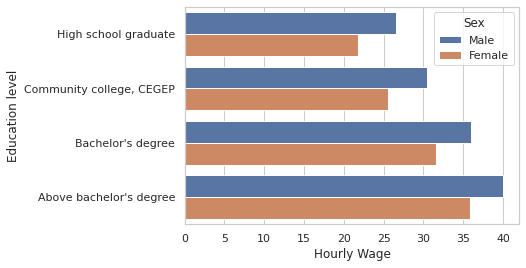

In [ ]:
### Horizontal grouped bar chart
df_sex = pd.DataFrame({'Education level': df_edu_lvl['Education level'].values.tolist() * 2,
                   'Hourly Wage': df_edu_lvl['Male'].values.tolist() + df_edu_lvl['Female'].values.tolist(),
                   'Sex': ['Male'] * 4 + ['Female'] * 4})

sns.barplot(x = 'Hourly Wage', y = 'Education level', hue = 'Sex', data = df_sex)
plt.show()

In [ ]:
### Export CSV
df_edu_lvl.to_csv('wage-by-education-level.csv', index=True)